<a href="https://colab.research.google.com/github/manasiwaghmare18/eCommerce-Transactions-Dataset-Analysis/blob/main/Mansi_Waghmare_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data into Dataframes
customers_df = pd.read_csv('sample_data/Customers.csv')
products_df = pd.read_csv('sample_data/Products.csv')
transactions_df = pd.read_csv('sample_data/Transactions.csv')

In [ ]:
# Data Exploration
# 1. Basic Data Exploration
print("Customers Data:")
customers_head=customers_df.head()
print(customers_head)
customers_info=customers_df.info()
print(customers_info)
customers_describe=customers_df.describe(include='all')
print(customers_describe)
customers_shape=customers_df.shape
print(customers_shape)

Customers Data:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carrol

**Result For Customers Dataset:**

*   Rows: 200
*   Columns: 4
*   Includes CustomerID, CustomerName, Region, and SignupDate.
*   No missing values in any column.








In [ ]:
print("\nProducts Data:")
products_head=products_df.head()
products_info=products_df.info()
products_describe=products_df.describe()
products_shape=products_df.shape
print(products_head)
print(products_info)
print(products_describe)
print(products_shape)


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
None
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
(100, 4)


**Result For Product Dataset:**

*   Rows: 100
*   Columns: 4
*   Includes ProductID ,ProductName ,Category ,Price.
*   No missing values in any column.

**Insights from Summary:**


*   Products cover diverse categories like Books, Electronics, Home Decor, and Clothing.
*   Price range: ₹16.08 (min) to ₹497.76 (max) with an average price of ₹267.55.



In [ ]:
print("\nTransactions Data:")
tansaction_head=transactions_df.head()
tansaction_info=transactions_df.info()
transaction_describe=transactions_df.describe()
transaction_shape=transactions_df.shape
print(tansaction_head)
print(tansaction_info)
print(transaction_describe)
print(transaction_shape)


Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-

**Result For Transactions Dataset:**


*   Rows: 1000
*   Columns: 7
*  Includes TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, and Price.
*   No missing values in any column.

# 2. Data Cleaning



In [ ]:
# Convert date columns to datetime format
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

# Check for duplicate entries in both datasets
transactions_duplicates = transactions_df.duplicated().sum()
customers_duplicates = customers_df.duplicated().sum()
product_duplicates=products_df.duplicated().sum()

print(transactions_duplicates)
print(customers_duplicates)
print(product_duplicates)


0
0
0


**Which means No Duplicate values in all 3 tables.**

In [ ]:
# Check for null values in the customers dataframe
null_values1 = customers_df.isnull().sum()
null_values1

null_values2 = products_df.isnull().sum()
null_values2

null_values3 = transactions_df.isnull().sum()
null_values3



,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


**So there are no NaN values**

**Merge datasets for a comprehensive analysis**

In [ ]:
# Merge datasets on CustomerID for a comprehensive analysis
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')
# Merge the transactions, customers, and products datasets
final_merged_df = merged_df.merge(products_df, on="ProductID", how="left")
print(final_merged_df)

# Basic overview of the merged dataset
final_merged_info = merged_df.info()
final_merged_head = merged_df.head()
final_merged_describe = merged_df.describe(include='all')
final_merged_shape = merged_df.shape

final_merged_info, final_merged_head,final_merged_describe,final_merged_shape


    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x          CustomerName         Region SignupDate  \
0        300.68   300.68        Andrea Jenkins         Euro

(None,
   TransactionID CustomerID ProductID     TransactionDate  Quantity  \
 0        T00001      C0199      P067 2024-08-25 12:38:23         1   
 1        T00112      C0146      P067 2024-05-27 22:23:54         1   
 2        T00166      C0127      P067 2024-04-25 07:38:55         1   
 3        T00272      C0087      P067 2024-03-26 22:55:37         2   
 4        T00363      C0070      P067 2024-03-21 15:10:10         3   
 
    TotalValue   Price     CustomerName         Region SignupDate  
 0      300.68  300.68   Andrea Jenkins         Europe 2022-12-03  
 1      300.68  300.68  Brittany Harvey           Asia 2024-09-04  
 2      300.68  300.68  Kathryn Stevens         Europe 2024-04-04  
 3      601.36  300.68  Travis Campbell  South America 2024-04-11  
 4      902.04  300.68    Timothy Perez         Europe 2022-03-15  ,
        TransactionID CustomerID ProductID                TransactionDate  \
 count           1000       1000      1000                           1000   
 u

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


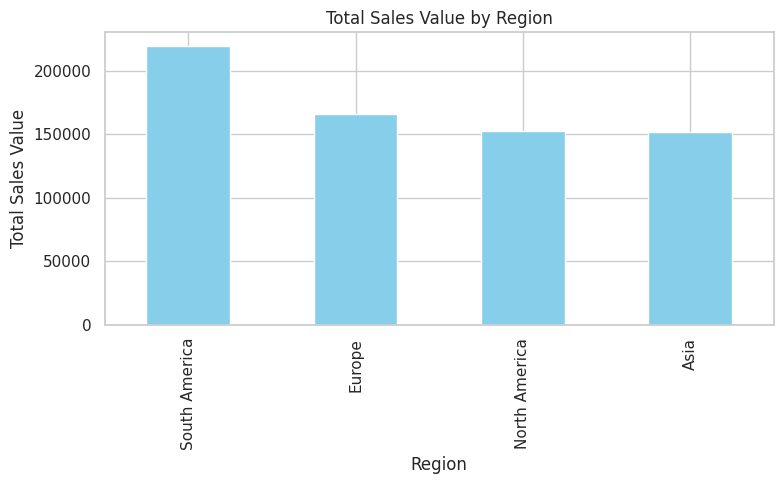

In [ ]:
# 1. Top 5 regions by total sales value
region_sales = merged_df.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print(region_sales)
top_regions_plot = region_sales.plot(kind="bar", figsize=(8, 5), color="skyblue", title="Total Sales Value by Region")
plt.ylabel("Total Sales Value")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


**South America leads in sales, followed by Europe, North America, and Asia, indicating regional performance variations.**

Month
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Name: TotalValue, dtype: float64


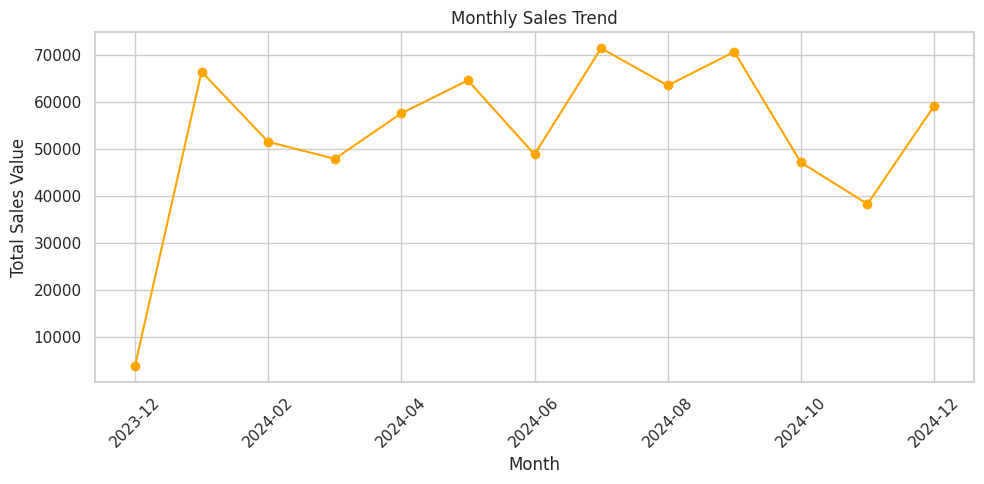

In [ ]:
# 2. Monthly sales trend
merged_df['Month'] = merged_df['TransactionDate'].dt.to_period('M').astype(str)
monthly_sales = merged_df.groupby("Month")["TotalValue"].sum()
print(monthly_sales)
monthly_sales_plot = monthly_sales.plot(figsize=(10, 5), marker='o', color="orange", title="Monthly Sales Trend")
plt.ylabel("Total Sales Value")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**Sales fluctuate throughout the year, with peaks in January, July, and September, and dips in the months following, suggesting seasonal buying patterns.**

CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


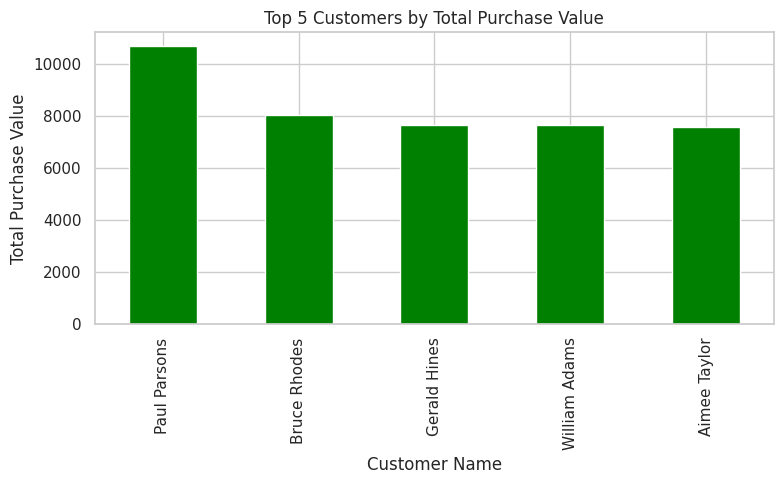

In [ ]:
# 3. Top 5 customers by total purchase value
top_customers = merged_df.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(5)
print(top_customers)
top_customers_plot = top_customers.plot(kind="bar", figsize=(8, 5), color="green", title="Top 5 Customers by Total Purchase Value")
plt.ylabel("Total Purchase Value")
plt.xlabel("Customer Name")
plt.tight_layout()
plt.show()

**Paul Parsons, Bruce Rhodes, Gerald Hines, William Adams, and Aimee Taylor are the top 5 customers, contributing the most to overall revenue.**

ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


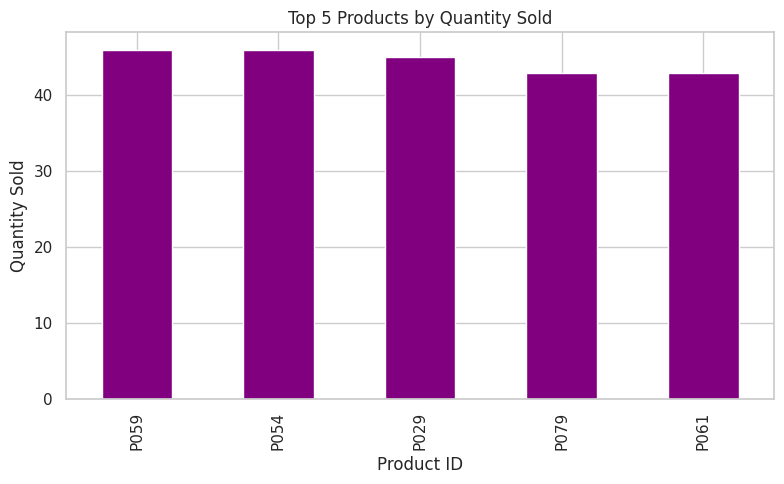

In [ ]:
# 4. Top 5 products by quantity sold
top_products = merged_df.groupby("ProductID")["Quantity"].sum().sort_values(ascending=False).head(5)
print(top_products)
top_products_plot = top_products.plot(kind="bar", figsize=(8, 5), color="purple", title="Top 5 Products by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.xlabel("Product ID")
plt.tight_layout()
plt.show()

**Maintaining sufficient stock of P059, P054, P029, P079, and P061 is crucial to meet customer demand and avoid stockouts, given their high sales volume.**

TransactionDate
2023-12-30 15:29:12     313.92
2023-12-31 03:27:43     958.80
2023-12-31 06:53:54    1585.36
2023-12-31 15:44:04     911.44
2024-01-01 03:54:19     147.95
                        ...   
2024-12-26 14:40:03     300.68
2024-12-26 21:34:07     261.20
2024-12-27 17:31:24     294.44
2024-12-27 18:20:31     458.12
2024-12-28 11:00:00     476.79
Name: TotalValue, Length: 1000, dtype: float64


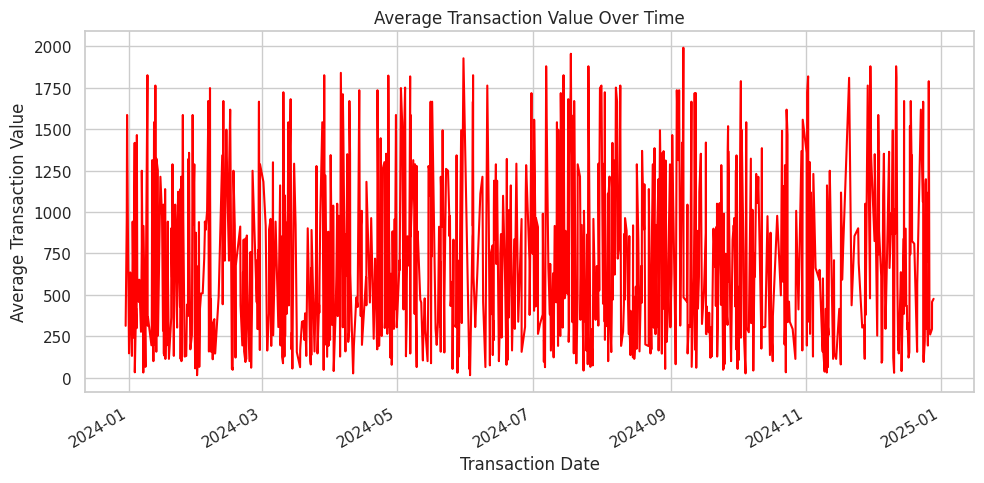

In [ ]:
# 5. Average transaction value over time
average_transaction_value = merged_df.groupby("TransactionDate")["TotalValue"].mean()
print(average_transaction_value)
average_transaction_plot = average_transaction_value.plot(figsize=(10, 5), color="red", title="Average Transaction Value Over Time")
plt.ylabel("Average Transaction Value")
plt.xlabel("Transaction Date")
plt.tight_layout()
plt.show()

**Average transaction value fluctuates significantly daily, indicating variability in customer spending habits.**

**a. Category-Wise Revenue and Sales Quantity**

In [ ]:
print(final_merged_df)

      Category  total_revenue   avg_price  total_quantity
0        Books      192147.47  280.526222             681
1     Clothing      166170.66  283.104254             590
2  Electronics      180783.50  288.722008             627
3   Home Decor      150893.93  237.616250             639


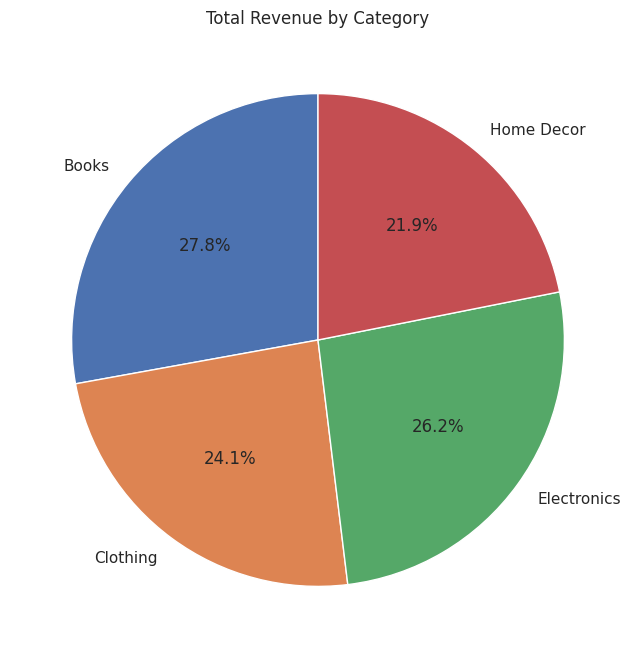

In [ ]:
# Group by Category to analyze revenue and quantity From the final merged data

category_analysis = final_merged_df.groupby("Category").agg(total_revenue=("TotalValue", "sum"),
    avg_price=("Price_y", "mean"),
    total_quantity=("Quantity", "sum"),
).reset_index()
print(category_analysis)

# Create the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(category_analysis['total_revenue'], labels=category_analysis['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Total Revenue by Category')
plt.show()

**Result :**
**Books dominate sales with the highest revenue and quantity sold, while Home Decor have the lowest average price per unit.**


1.   While Books and Electronics generate nearly equal revenue shares, Clothing and Home Decor represent opportunities for targeted growth strategies.
2.   By implementing targeted growth strategies like optimizing the product mix, improving marketing, or potentially diversifying within those categories, the business could potentially increase overall revenue and market share.



**b. Top-Selling Products by Revenue:**

**Identify the top 5 products generating the most revenue.**

              ProductName  total_revenue  total_quantity
9   ActiveWear Smartwatch       39096.97             100
47   SoundWave Headphones       25211.64              97
52        SoundWave Novel       24507.90              58
4       ActiveWear Jacket       22712.56              76
6          ActiveWear Rug       22314.43              79


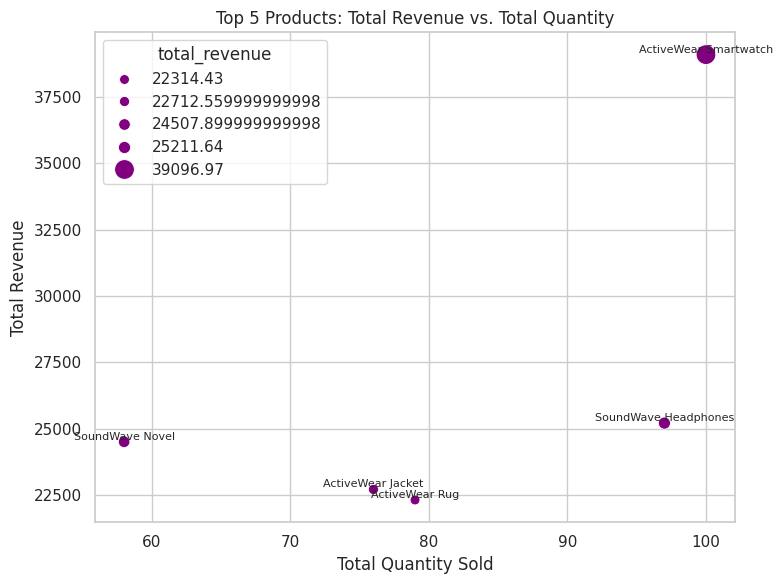

In [ ]:
top_products = final_merged_df.groupby("ProductName").agg(
    total_revenue=("TotalValue", "sum"),
    total_quantity=("Quantity", "sum")
).reset_index().sort_values(by="total_revenue", ascending=False).head(5)
print(top_products)

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.scatterplot(x="total_quantity", y="total_revenue", data=top_products, color="purple", size="total_revenue", sizes=(50, 200))
plt.title("Top 5 Products: Total Revenue vs. Total Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Total Revenue")
# Add labels to the points
for i, row in top_products.iterrows():
    plt.text(row["total_quantity"], row["total_revenue"], row["ProductName"], fontsize=8, ha="center", va="bottom")


plt.tight_layout()
plt.show()



1.   **"ActiveWear Smartwatch" and "SoundWave Headphones" are the top revenue-generating products, indicating their popularity and potential for high profitability.**
2.   **Despite lower sales volume, "SoundWave Novel" generates significant revenue, highlighting its higher price point and potential for strategic pricing adjustments.**



**c. Price Distribution Across Categories:**

**Visualize the distribution of product prices by category.**

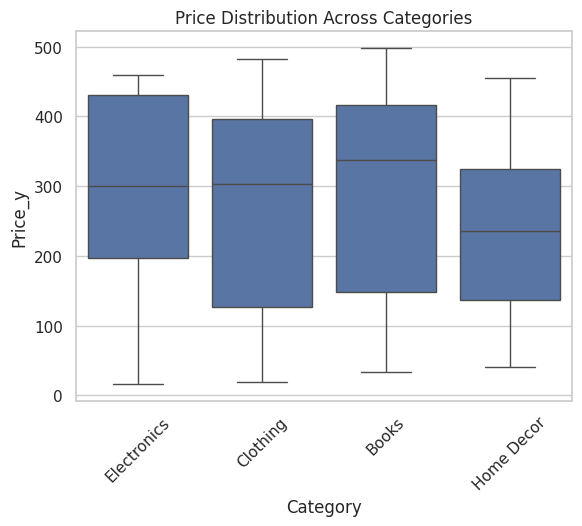

['Electronics' 'Clothing' 'Books' 'Home Decor'] [300.68 217.05 239.7  147.95 290.17 274.94 454.53 100.81 227.26 374.16
 456.28 155.65  57.3   48.69 350.13 153.19 420.15 147.22 416.35 156.96
 337.91  44.12  65.16 440.7  159.33 447.23 389.2  429.29 372.55 114.2
 157.62 437.65 277.86 284.62 229.06  41.18 126.34 430.59 330.05 137.54
 335.84 399.34 303.2  196.4  379.44 295.58 488.63 325.01  66.32 261.2
 307.47 469.77 416.4  354.81 427.61  33.59 220.91 263.55 337.22 158.93
 169.3  304.94  26.99 121.32 128.53 452.42 165.3  436.89 455.72 404.4
  30.59  64.25  26.26  95.69 433.64 319.34 303.5  354.29 385.37 396.34
  18.82 346.3   16.08  55.99 159.6  497.76 429.31 235.58 447.34 417.37
 338.66 146.85 222.95 127.36 299.93  64.38 481.78 366.07 265.51 459.86]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=final_merged_df, x="Category", y="Price_y")
plt.title("Price Distribution Across Categories")
plt.xticks(rotation=45)
plt.show()

print( final_merged_df["Category"].unique(), final_merged_df["Price_y"].unique())



*   **Books & Home Decor Consistency: Books and Home Decor exhibit more consistent pricing, implying a focus on affordability and potentially lower price variability compared to Electronics and Clothing.**
*   **Electronics & Clothing Premium: Electronics and Clothing generally command higher prices with wider price ranges, suggesting a greater variety of product offerings and potentially higher profit margins.**



**d. Customer Demographics:**

**Region-Wise Transactions:
Analyze the number of transactions and total revenue contributed by each region.**

In [ ]:
region_analysis = final_merged_df.groupby("Region").agg(
    total_transactions=("TransactionID", "count"),
    total_revenue=("TotalValue", "sum")
).reset_index()
print(region_analysis)

          Region  total_transactions  total_revenue
0           Asia                 218      152074.97
1         Europe                 234      166254.63
2  North America                 244      152313.40
3  South America                 304      219352.56




*   **South America Dominance: South America leads in both total transactions and revenue, indicating a strong market presence and potential for further growth.**
*   **Regional Performance: While Asia, Europe, and North America show relatively similar performance, targeted strategies might be needed to boost sales in specific regions based on their unique characteristics.**



**e. Sales Trend Over Time:**

**Extract the month from TransactionDate and analyze sales trends.**

Monthly Sales Data:
    TransactionMonth  total_revenue  total_quantity
0                  1       66376.39             252
1                  2       51459.27             192
2                  3       47828.73             216
3                  4       57519.06             203
4                  5       64527.74             219
5                  6       48771.18             186
6                  7       71366.39             267
7                  8       63436.74             227
8                  9       70603.75             245
9                 10       47063.22             165
10                11       38224.37             147
11                12       62818.72             218


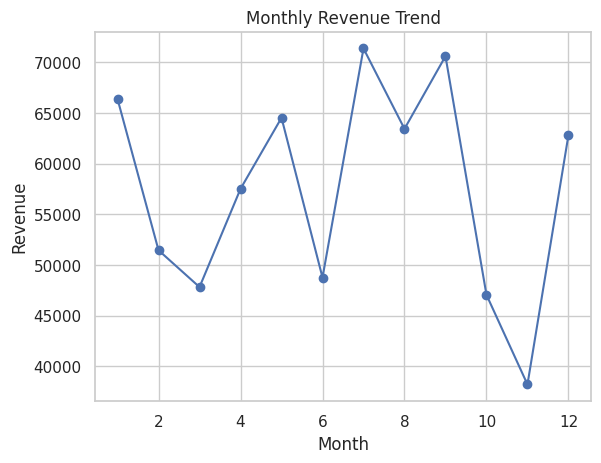

In [ ]:
final_merged_df["TransactionMonth"] = pd.to_datetime(final_merged_df["TransactionDate"]).dt.month
monthly_sales = final_merged_df.groupby("TransactionMonth").agg(
    total_revenue=("TotalValue", "sum"),
    total_quantity=("Quantity", "sum")
).reset_index()
print('Monthly Sales Data:')
print(monthly_sales)

# Plotting sales trend
plt.plot(monthly_sales["TransactionMonth"], monthly_sales["total_revenue"], marker="o")
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()



* **Sales Seasonality: Sales exhibit a clear seasonal pattern, with peaks in January, July, and September (likely due to New Year, back-to-school, and pre-holiday shopping), and dips in November, February, March, and October (post-holiday slowdown and seasonal factors).**
*   **Back-to-School & Holiday Impact: Revenue surges during the back-to-school season (July-September) and potentially during the holiday season (November-December), indicating the importance of targeted marketing and inventory planning for these periods.**
*   **Transaction Value Fluctuation: Revenue peaks don't always align with sales quantity peaks, suggesting that average transaction value varies across months, potentially due to changes in product mix, pricing, or customer purchasing behavior. This warrants further investigation and optimization.**




